In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
#pandas dataset to a pandas dataFrame
cc_d = pd.read_csv('/creditcard1.csv')

In [66]:
#last 5 rows of the dataset
cc_d.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [67]:
cc_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [68]:
#distribution of legit and fraudulent transactions
cc_d['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 --> Normal Transaction
1 --> fraudulent transation

In [69]:
# separating the data
legit =cc_d[cc_d.Class ==0]
fraud =cc_d[cc_d.Class ==1]

In [70]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [71]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [72]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [73]:
cc_d.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [74]:
legit_sample=legit.sample(n=492)

Concatenate two Dataframes

In [75]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [76]:
new_dataset.shape

(984, 31)

In [77]:
new_dataset.tail

<bound method NDFrame.tail of             Time        V1        V2  ...       V28  Amount  Class
261392  159992.0 -0.467075  1.046641  ...  0.134199   48.46      0
200907  133636.0  2.161311 -1.044472  ... -0.057953    1.00      0
163880  116275.0  2.106065 -0.123269  ... -0.058089    1.00      0
28225    34909.0 -0.648687  0.862279  ...  0.104062    1.00      0
79517    58058.0 -2.355118  0.632890  ... -0.328685  110.00      0
...          ...       ...       ...  ...       ...     ...    ...
279863  169142.0 -1.927883  1.125653  ...  0.147968  390.00      1
280143  169347.0  1.378559  1.289381  ...  0.186637    0.76      1
280149  169351.0 -0.676143  1.126366  ...  0.194361   77.89      1
281144  169966.0 -3.113832  0.585864  ... -0.253700  245.00      1
281674  170348.0  1.991976  0.158476  ... -0.015309   42.53      1

[984 rows x 31 columns]>

In [78]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,95257.579268,-0.007407,-0.009645,-0.078957,0.087768,-0.000165,-0.002359,0.009059,-0.026520,-0.053875,-0.026300,-0.021368,-0.089182,0.017613,0.034000,-0.045478,0.064121,0.083528,0.079577,0.028104,-0.028638,0.006904,0.019324,0.042703,-0.000246,0.030302,0.004063,0.022693,-0.001770,93.931728
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting te data

In [102]:
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']

In [194]:
X = cc_d.drop(columns='Class',axis=1)
Y = cc_d['Class']

In [195]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [196]:
print(X)

            Time         V1         V2  ...       V27       V28  Amount
0            0.0  -1.359807  -0.072781  ...  0.133558 -0.021053  149.62
1            0.0   1.191857   0.266151  ... -0.008983  0.014724    2.69
2            1.0  -1.358354  -1.340163  ... -0.055353 -0.059752  378.66
3            1.0  -0.966272  -0.185226  ...  0.062723  0.061458  123.50
4            2.0  -1.158233   0.877737  ...  0.219422  0.215153   69.99
...          ...        ...        ...  ...       ...       ...     ...
284802  172786.0 -11.881118  10.071785  ...  0.943651  0.823731    0.77
284803  172787.0  -0.732789  -0.055080  ...  0.068472 -0.053527   24.79
284804  172788.0   1.919565  -0.301254  ...  0.004455 -0.026561   67.88
284805  172788.0  -0.240440   0.530483  ...  0.108821  0.104533   10.00
284806  172792.0  -0.533413  -0.189733  ... -0.002415  0.013649  217.00

[284807 rows x 30 columns]


Split Data into training and testing data

In [197]:
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y,test_size=0.2,stratify=Y,random_state=2)

**Model Training**


Logistic *Regression*

In [198]:
#training the logestic regression model with training data
model = LogisticRegression()

In [199]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [200]:
X_train_prediction =model.predict(X_train)
accuracy_score(X_train_prediction,Y_train)

0.9989247075862977

In [201]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, Y_train)
dt_yhat = DT.predict(X_test)


In [202]:
accuracy_score(Y_test, dt_yhat)


0.9994733330992591

In [214]:
from sklearn.neighbors import KNeighborsClassifier
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, Y_train)
knn_yhat = KNN.predict(X_test)


In [215]:
accuracy_score(Y_test, knn_yhat)

0.9983497770443454

In [216]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
svm_yhat = svm.predict(X_test)


In [217]:
accuracy_score(Y_test, svm_yhat)

0.9982795547909132

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


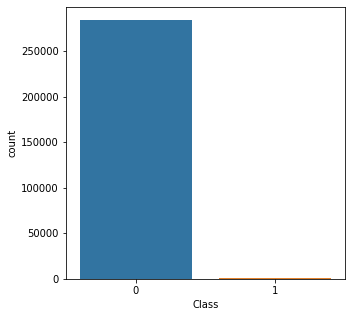

In [212]:
plt.figure(figsize = (5,5))
sns.countplot('Class', data = cc_d)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


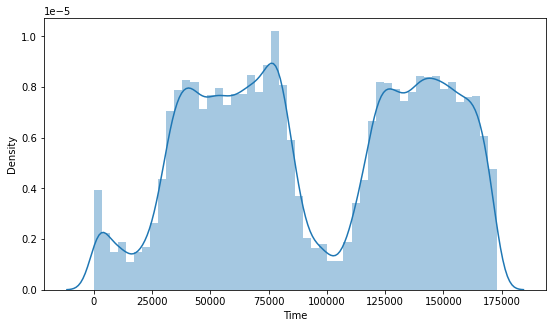

In [213]:
plt.figure(figsize = (9,5))
sns.distplot(cc_d['Time'])



In [132]:
cc_d.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


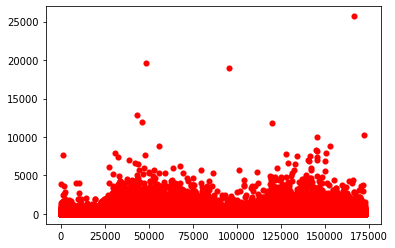

In [141]:
plt.scatter(legit.Time,legit.Amount,alpha=1,linewidths=0.1,color='Red')
plt.show()

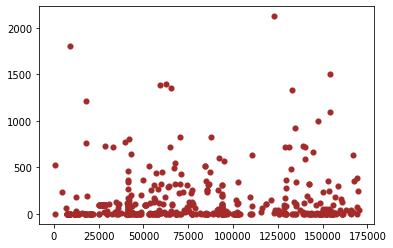

In [145]:
plt.scatter(fraud.Time,fraud.Amount,alpha=1,linewidths=0.1,color='brown')
plt.show()

In [155]:
cc_d.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

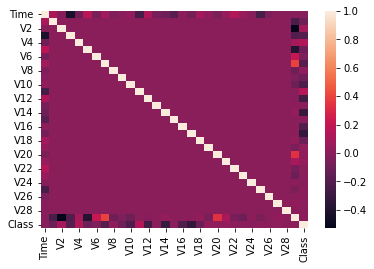

In [219]:
sns.heatmap(cc_d.corr())

In [222]:
new_dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.234931,-0.219919,0.161971,-0.195521,0.294081,0.088710,0.221801,-0.135203,0.177333,0.228988,-0.319364,0.273740,-0.125268,0.175604,-0.157488,0.236197,0.239825,0.258475,-0.101623,-0.082852,-0.058869,0.140455,0.059625,-0.021176,-0.189318,-0.023085,-0.131665,-0.032161,-0.024117,-0.150645
V1,0.234931,1.000000,-0.727430,0.875973,-0.621053,0.852261,0.304766,0.865649,-0.066109,0.665983,0.734625,-0.515897,0.585531,-0.060382,0.435231,0.098308,0.621250,0.665462,0.665373,-0.304053,-0.178622,0.039062,-0.048001,-0.119914,-0.085462,-0.103777,0.037858,0.143711,0.236823,-0.068070,-0.427018
V2,-0.219919,-0.727430,1.000000,-0.823697,0.620971,-0.767792,-0.267577,-0.834709,-0.026881,-0.680241,-0.759440,0.588948,-0.636137,-0.010702,-0.540016,-0.185112,-0.612678,-0.613685,-0.600898,0.174173,0.371293,0.053737,-0.012132,0.002507,-0.020874,0.012606,-0.036488,-0.225550,0.089518,-0.288641,0.474200
V3,0.161971,0.875973,-0.823697,1.000000,-0.767538,0.854789,0.461591,0.883629,-0.166537,0.761746,0.859762,-0.712993,0.755342,-0.058721,0.650702,0.131422,0.722806,0.732053,0.700597,-0.308271,-0.277414,0.039071,-0.064092,-0.041234,0.020920,-0.078775,-0.009652,0.099191,0.147645,-0.005089,-0.560868
V4,-0.195521,-0.621053,0.620971,-0.767538,1.000000,-0.575045,-0.421234,-0.690470,0.097751,-0.780632,-0.782159,0.792956,-0.822235,0.056604,-0.786944,-0.099301,-0.717410,-0.705964,-0.641358,0.300660,0.187828,-0.034182,0.125001,0.068258,-0.078113,-0.010008,0.158078,0.016388,-0.099492,0.040246,0.696440
V5,0.294081,0.852261,-0.767792,0.854789,-0.575045,1.000000,0.281336,0.833499,-0.197166,0.658135,0.764782,-0.527763,0.615484,-0.104840,0.426549,0.078784,0.687211,0.744414,0.742141,-0.384949,-0.294105,0.043741,-0.093327,-0.075550,-0.133183,-0.063370,0.066293,0.195291,0.160247,-0.121298,-0.374180
V6,0.088710,0.304766,-0.267577,0.461591,-0.421234,0.281336,1.000000,0.275141,-0.573546,0.373737,0.416769,-0.495584,0.488741,-0.096805,0.537056,-0.067305,0.431624,0.417959,0.354668,-0.206345,-0.051700,0.019467,0.008993,0.307678,-0.014012,-0.136387,-0.058105,-0.164180,-0.029016,0.174969,-0.396796
V7,0.221801,0.865649,-0.834709,0.883629,-0.690470,0.833499,0.275141,1.000000,0.097268,0.755111,0.868068,-0.634215,0.711700,-0.009485,0.532136,0.186232,0.740488,0.761085,0.761008,-0.329826,-0.333739,0.048091,-0.114600,-0.054817,-0.040702,0.070020,0.036699,0.242430,0.139575,0.150103,-0.473614
V8,-0.135203,-0.066109,-0.026881,-0.166537,0.097751,-0.197166,-0.573546,0.097268,1.000000,-0.071683,-0.051525,0.175584,-0.172307,0.264987,-0.192118,0.145220,-0.175858,-0.218776,-0.177971,0.212290,-0.038179,-0.097074,0.021840,-0.399846,0.079890,0.214076,0.040411,0.268531,-0.012485,0.015307,0.060382
V9,0.177333,0.665983,-0.680241,0.761746,-0.780632,0.658135,0.373737,0.755111,-0.071683,1.000000,0.840477,-0.692908,0.755469,-0.025790,0.670245,0.125666,0.723331,0.755731,0.712013,-0.323181,-0.342786,0.163117,-0.228141,-0.044062,0.014047,-0.013350,-0.120391,0.128513,0.129151,0.019658,-0.548048


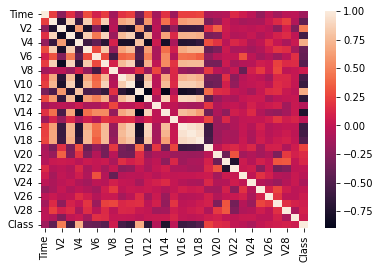

In [223]:
sns.heatmap(new_dataset.corr())